## Phase 1: Exploratory Data Analysis (EDA)

### Objective:
The primary goal of Phase 1 is to build a complete understanding of the Netflix dataset. This phase lays the foundation for all downstream work by identifying key patterns, data types, distributions, and anomalies in the raw data.

---

### Key Focus Areas:
- Understand the structure and schema of the dataset.
- Quantify and visualize missing values across key fields such as `director`, `cast`, `country`, and `rating`.
- Analyze the distribution of categorical variables like:
  - **Type** (Movie vs TV Show)
  - **Rating** (TV-MA, PG, R, etc.)
  - **Genres** (`listed_in`)
- Investigate temporal trends:
  - Year-wise content production (`release_year`)
  - Growth of Netflix content over time
- Examine country-wise content volume.
- Identify the most dominant genres across all content types.

---

### Deliverables:
- Summary statistics using `df.info()`, `describe()`, and `isnull().sum()`
- High-level visual insights:
  - Count of Movies vs TV Shows
  - Top 10 producing countries
  - Release trend over the years
  - Rating distribution

---

### Insights Expected:
- Content trends across time and geography
- Genre popularity and potential for feature extraction
- Rating classification feasibility
- Data cleanliness, sparsity, and encoding challenges to address in Phase 2

---

### Outcome:
By the end of Phase 1, we will have a well-documented understanding of the dataset and a strong analytical base to drive feature engineering, cleaning, and modeling in the next phases.


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("netflix_titles.csv")

# Show first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

C:\Users\chala\AppData\Local\Temp\ipykernel_22196\3229486348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


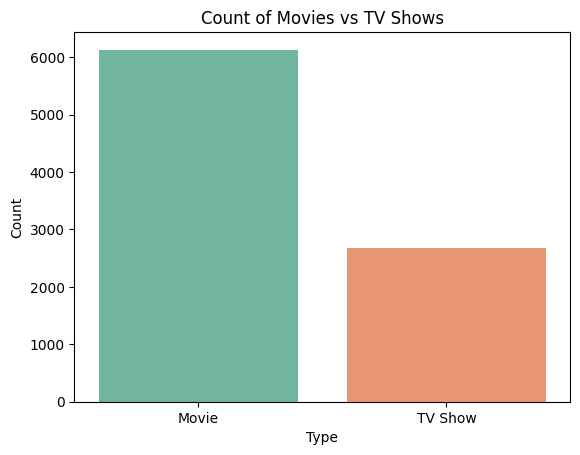

In [6]:
# Import Seaborn and Matplotlib — two main libraries for plotting in Python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to show how many 'Movie' and 'TV Show' entries are in the dataset
sns.countplot(
    data=df,           # Our DataFrame
    x='type',          # Column to plot on the X-axis (either 'Movie' or 'TV Show')
    palette='Set2'     # Color scheme for the bars (Set2 is a soft, distinct color set)
)

# Set the chart title
plt.title("Count of Movies vs TV Shows")

# Label the X-axis
plt.xlabel("Type")

# Label the Y-axis
plt.ylabel("Count")

# Display the plot
plt.show()


C:\Users\chala\AppData\Local\Temp\ipykernel_22196\3344346720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


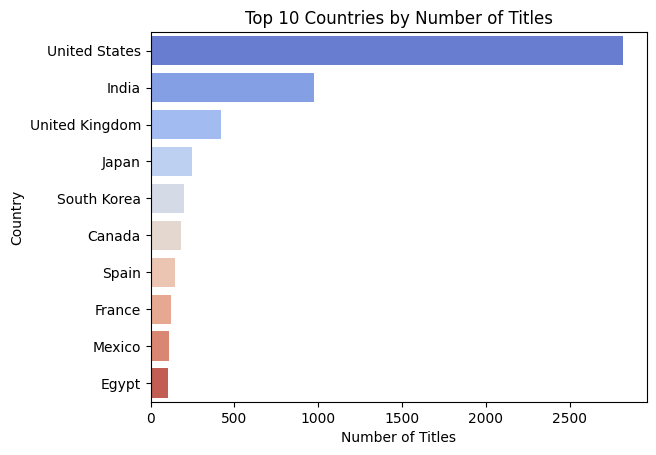

In [7]:
# Get top 10 countries by number of titles
top_countries = df['country'].value_counts().dropna().head(10) #.dropna() ➡️ Removes entries where country was missing (NaN) and head(10) takes top 10 

# Plot using Seaborn barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=top_countries.values,    # Number of titles (count)
    y=top_countries.index,     # Country names
    palette='coolwarm'         # Color palette for visual appeal
)

plt.title("Top 10 Countries by Number of Titles")  # Chart title
plt.xlabel("Number of Titles")                     # X-axis label
plt.ylabel("Country")                              # Y-axis label
plt.show()


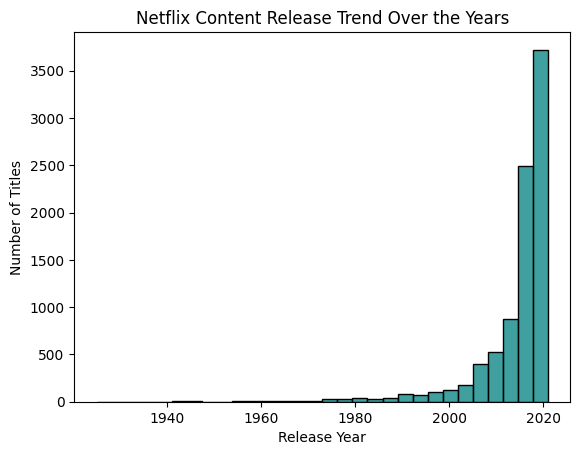

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot number of titles released each year
sns.histplot(
    data=df,                # Use our Netflix DataFrame
    x='release_year',       # Year of release on X-axis
    bins=30,                # Group years into 30 buckets
    kde=False,              # No density curve, just bars
    color='teal'            # Bar color
)

plt.title("Netflix Content Release Trend Over the Years")  # Title of the plot
plt.xlabel("Release Year")                                 # Label X-axis
plt.ylabel("Number of Titles")                             # Label Y-axis
plt.show()


C:\Users\chala\AppData\Local\Temp\ipykernel_22196\3514196999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


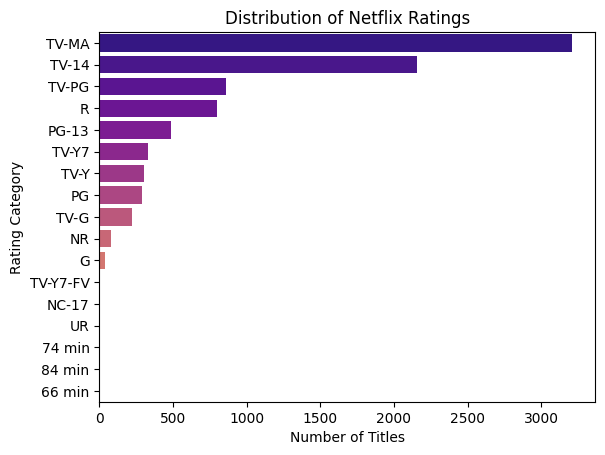

'Notice these weird entries:\n\n"74 min", "84 min", "66 min" ⛔\n➤ These are not ratings — they accidentally ended up in the rating column.\n\nLikely due to data entry error where a value meant for duration got shifted into the wrong column.'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for 'rating' to show how many titles exist for each rating category
sns.countplot(
    data=df,                                         # Netflix DataFrame
    y='rating',                                      # Rating on Y-axis (for a clean horizontal view)
    order=df['rating'].value_counts().index,         # Sort ratings by frequency
    palette='plasma'                                 # Visually distinct color scheme
)

plt.title("Distribution of Netflix Ratings")         # Chart title
plt.xlabel("Number of Titles")                       # X-axis label
plt.ylabel("Rating Category")                        # Y-axis label
plt.show()

'''Notice these weird entries:

"74 min", "84 min", "66 min" ⛔
➤ These are not ratings — they accidentally ended up in the rating column.

Likely due to data entry error where a value meant for duration got shifted into the wrong column.'''


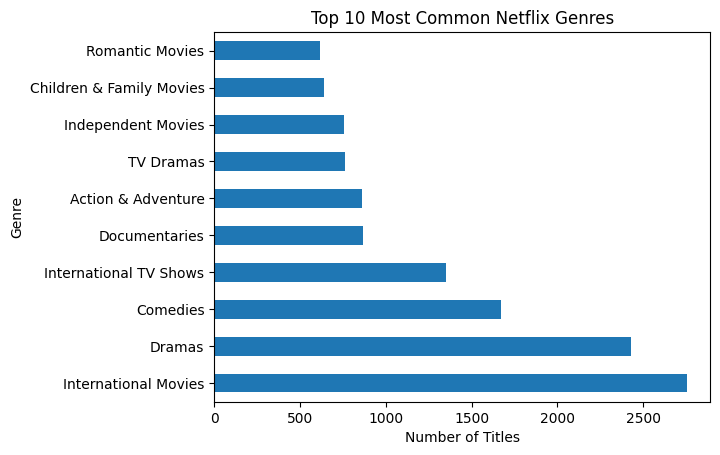

In [10]:
# Plot top 10 most common genres
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# here bar automatically makes a horizontal bar :- hence name on y and values on x axis


## Phase 2: Data Cleaning + Feature Engineering  

###  **Goal:**  
Prepare a **clean, consistent, and ML-ready dataset** by fixing errors, handling missing values, encoding categorical features, and creating new useful columns.  

---

### **Tasks Overview**

1. **Handle Missing Values**  
   - Check which columns have missing (`NaN`) entries using `df.isnull().sum()`.  
   - Decide per column:  
     - Drop if not important (e.g., `director`, `cast`).  
     - Fill (impute) with “Unknown” or most frequent value if important.  

2. **Fix Incorrect Entries**  
   - Some ratings (like `"74 min"`, `"84 min"`) are actually *durations* accidentally placed in the `rating` column.  
   - Identify and correct or remove these records.  

3. **Convert Duration into Numeric**  
   - For Movies: `"90 min"` → `90`.  
   - For TV Shows: `"2 Seasons"` → `2`.  
   - Store them in a new column like `duration_num`.  

4. **Encode Categorical Features**  
   - Convert text categories into numbers so ML models can use them.  
   - Examples:  
     - `type` → Movie (1), TV Show (0)  
     - `rating` → LabelEncoder or OneHotEncoder  
     - `country` → Encode top 10 countries only to reduce noise  

5. **Feature Engineering**  
   Create new columns that can improve predictions:  
   - `decade` → from `release_year` (e.g., 1990s, 2000s, 2010s)  
   - `is_movie` → binary flag for type  
   - `genre_count` → number of genres a title has (`listed_in`)  
   - `description_length` → number of words in the description  

6. **Text Cleaning for TF-IDF (Future Phase 4)**  
   - Clean and store a text column (from `description`) for future recommendation system:  
     - Lowercase, remove punctuation, numbers, stopwords  
     - Lemmatize if using `nltk`  

7. **Final Clean DataFrame Export**  
   - Save your processed dataset as `netflix_cleaned.csv` for modeling and TF-IDF use.  

---

### **Expected Output**
A clean dataset with:  
- No missing or misplaced values  
- Numeric columns for ML models  
- Engineered features ready for Phase 3  
- Clean text column ready for TF-IDF  

---

### **Skills Practiced**
- Data preprocessing  
- Feature engineering  
- Text preprocessing basics  
- Encoding techniques  


In [11]:
import pandas as pd

# Load dataset again if not already loaded
df = pd.read_csv("netflix_titles.csv")

# Show how many values are missing in each column
print(df.isnull().sum())

# Check unique values in 'rating' column to find errors like '74 min'
print(df['rating'].unique())

# Remove rows where rating contains numbers like '74 min', '84 min', etc.
df = df[~df['rating'].str.contains('min', na=False)]

# Fill missing values for 'director', 'cast','rating' and 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

# Fill missing values for 'date_added' with the mode (most common date)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

# Check again if all missing values are handled
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


C:\Users\chala\AppData\Local\Temp\ipykernel_22196\4191353406.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\chala\AppData\Local\Temp\ipykernel_22196\4191353406.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [12]:
# Function to extract numeric part from duration
'''to remove the duration and mins part from 90mins and 2 seasons'''
def convert_duration(x):
    if pd.isnull(x):
        return 0  # If empty, return 0
    else:
        return int(x.split()[0])  # Take the first part before space and convert to int

# Apply function to the 'duration' column
df['duration_num'] = df['duration'].apply(convert_duration)

# Check the result
df[['duration', 'duration_num']].head(10)


,duration,duration_num
0,90 min,90
1,2 Seasons,2
2,1 Season,1
3,1 Season,1
4,2 Seasons,2
5,1 Season,1
6,91 min,91
7,125 min,125
8,9 Seasons,9
9,104 min,104


In [13]:
'''encoding to no.s for ML to understand it properly'''

from sklearn.preprocessing import LabelEncoder

# Encode 'type': Movie=1, TV Show=0
df['is_movie'] = df['type'].apply(lambda x: 1 if x=='Movie' else 0) # makes a new encoded colm for type of only movie checker

# Encode 'rating' using LabelEncoder
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating']) # makes a new endoded colm for rating 

# Handle 'country': keep top 10, rest as 'Other'
top_countries = df['country'].value_counts().head(10).index
df['country_clean'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')
df['country_encoded'] = le.fit_transform(df['country_clean'])

# Check the new columns
df[['type', 'is_movie', 'rating', 'rating_encoded', 'country', 'country_encoded']].head(10)


,type,is_movie,rating,rating_encoded,country,country_encoded
0,Movie,1,PG-13,4,United States,9
1,TV Show,0,TV-MA,8,South Africa,5
2,TV Show,0,TV-MA,8,Unknown,10
3,TV Show,0,TV-MA,8,Unknown,10
4,TV Show,0,TV-MA,8,India,2
5,TV Show,0,TV-MA,8,Unknown,10
6,Movie,1,PG,3,Unknown,10
7,Movie,1,TV-MA,8,"United States, Ghana, Burkina Faso, United Kin...",5
8,TV Show,0,TV-14,6,United Kingdom,8
9,Movie,1,PG-13,4,United States,9


In [ ]:
'''add feature engineering to enhance model predictions'''

# 1Create 'decade' from 'release_year'
df['decade'] = (df['release_year'] // 10) * 10  # 1995 -> 1990, 2003 -> 2000

# 2️⃣ Count number of genres in 'listed_in'
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(', ')))  # 'Dramas, Comedies' -> 2

# 3️⃣ Count number of words in description
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))

# Check the new columns
df[['release_year', 'decade', 'listed_in', 'genre_count', 'description', 'description_length']].head(10)


,release_year,decade,listed_in,genre_count,description,description_length
0,2020,2020,Documentaries,1,"As her father nears the end of his life, filmm...",27
1,2021,2020,"International TV Shows, TV Dramas, TV Mysteries",3,"After crossing paths at a party, a Cape Town t...",27
2,2021,2020,"Crime TV Shows, International TV Shows, TV Act...",3,To protect his family from a powerful drug lor...,27
3,2021,2020,"Docuseries, Reality TV",2,"Feuds, flirtations and toilet talk go down amo...",24
4,2021,2020,"International TV Shows, Romantic TV Shows, TV ...",3,In a city of coaching centers known to train I...,24
5,2021,2020,"TV Dramas, TV Horror, TV Mysteries",3,The arrival of a charismatic young priest brin...,23
6,2021,2020,Children & Family Movies,1,Equestria's divided. But a bright-eyed hero be...,25
7,1993,1990,"Dramas, Independent Movies, International Movies",3,"On a photo shoot in Ghana, an American model s...",28
8,2021,2020,"British TV Shows, Reality TV",2,A talented batch of amateur bakers face off in...,26
9,2021,2020,"Comedies, Dramas",2,A woman adjusting to life after a loss contend...,29


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

# 1️Simple text cleaning function
def clean_text(text):
    text = str(text).lower()  # lowercase everything
    text = re.sub(f'[{string.punctuation}]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.strip()  # remove leading/trailing spaces
    return text

# Apply cleaning to the 'description' column
df['description_clean'] = df['description'].apply(clean_text)

# 2Create TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')  # automatically removes common English words
tfidf_matrix = tfidf.fit_transform(df['description_clean'])  # matrix: rows = movies, columns = words

print(tfidf_matrix.shape)


(8804, 20235)


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  # shape: (8804, 8804)
'''We pass the same matrix twice because we want to compare every movie’s TF-IDF vector with every other movie’s vector — including itself.'''

# Create a function to recommend similar titles
def recommend(title, df=df, sim_matrix=cosine_sim, top_n=5):
    # Find the index of the title in the DataFrame
    idx = df[df['title'] == title].index[0] 
    ''' checks if title we entered matches the df row , then selects that row and finds its index to know index of entered title'''
    ''' and index also gives a array so evenn if only one no still do [0] to get that '''
    
    # Get similarity scores for this title with all others
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    # Sort movies by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1] , reverse=True)
    
    # Take top_n + 1 titles (skip the first one, it’s the same movie)
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the indices of the recommended titles
    movie_indices = [i[0] for i in sim_scores] # since first column is title so take that (its still a number)
    
    # Return the recommended titles
    return df['title'].iloc[movie_indices].tolist()

# Test the recommendation function
recommend("Breaking Bad", top_n=5)


['Lucid Dream',
 'Sunrise',
 'In My Country',
 'My Only Mother',
 'We Are All For The Fatherland']

## Phase 4 — Machine Learning Model Training (Netflix Dataset)

Now that we’ve cleaned and preprocessed our dataset, it’s time to train some predictive models.

### Goal
We’ll build ML models that can **predict useful information about Netflix titles** — for example:
- What **rating** (G, PG, R, TV-MA, etc.) a new title might get  
- Which **decade** (1990s, 2000s, 2010s…) a title belongs to  

These are **classification problems**, since the output is a category label.

---

### Step 1 — Feature & Target Selection
We’ll pick a few columns as inputs (**features X**) and one as the output (**target y**).

#### Example A — Predict Rating
- **Features (X)** → `type`, `country`, `duration`, `listed_in`, `release_year`  
- **Target (y)** → `rating`

The model will learn:
> “Given the type, country, year, genre, and duration, predict what rating a title will get.”

#### Example B — Predict Decade
- **Features (X)** → `type`, `rating`, `duration`, `listed_in`  
- **Target (y)** → `decade` (derived from `release_year`)

---

### Step 2 — Pre-Processing

Before training:
1. Convert categorical text features (like `type`, `country`, `listed_in`) into numeric form using **LabelEncoder** or **One-Hot Encoding**.  
2. Split the dataset into **training** and **testing** sets using `train_test_split`.  
3. Handle any missing or rare values appropriately.

---

### Step 3 — Model Selection

We’ll try several simple classification models:
- **Logistic Regression** — good baseline for categorical prediction  
- **Random Forest Classifier** — handles mixed features and nonlinear relations  
- **Decision Tree Classifier** — interpretable, simple model  

Later we can tune them with Grid Search or add new models like SVM or XGBoost.

---

### Step 4 — Evaluation

After training, we’ll evaluate models using:
- **Accuracy Score**
- **Confusion Matrix**
- **Classification Report** (Precision, Recall, F1-score)

These metrics show how well our model predicts unseen data.

---

### Step 5 — Prediction Example

Once trained, our model can predict something like:

| Input | Output |
|-------|---------|
| Type: Movie, Genre: Action, Year: 2018, Duration: 100 | Predicted Rating: TV-MA |

This demonstrates how the model uses the learned relationships to make new predictions.

---




In [17]:
'''create input and output colums , X has inputs and use them to predict output Y column'''

# Select useful columns for modeling
df_model = df[['is_movie', 'release_year', 'duration_num', 'country_encoded', 'rating_encoded', 'listed_in']]

# Drop any remaining rows with missing values
df_model.dropna(inplace=True)

# Separate input (X) and target (y)
X = df_model[['is_movie', 'release_year', 'duration_num', 'country_encoded', 'listed_in']] #inputs
y = df_model['rating_encoded'] # output prediction using input columns of X (here we will predict rating using the inputs as X)

# Display first few rows to confirm
X.head()


C:\Users\chala\AppData\Local\Temp\ipykernel_22196\1421360525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.dropna(inplace=True)


,is_movie,release_year,duration_num,country_encoded,listed_in
0,1,2020,90,9,Documentaries
1,0,2021,2,5,"International TV Shows, TV Dramas, TV Mysteries"
2,0,2021,1,10,"Crime TV Shows, International TV Shows, TV Act..."
3,0,2021,1,10,"Docuseries, Reality TV"
4,0,2021,2,2,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
X.dtypes


is_movie            int64
release_year        int64
duration_num        int64
country_encoded     int64
listed_in          object
dtype: object

In [19]:
'''listed in is still object and not int --> make it int too'''

from sklearn.preprocessing import LabelEncoder

# Take only the first genre (before the first comma)
df_model['main_genre'] = df_model['listed_in'].apply(lambda x: x.split(',')[0].strip())
#this takes the first one assigns it to 0 , then keeps assigning the rest as 1,2,3... and so on at every unique occurance using LE

# Encode genres into numbers
le = LabelEncoder()
df_model['genre_encoded'] = le.fit_transform(df_model['main_genre'])

# Replace text genre column with the encoded one for modeling
X = df_model[['is_movie', 'release_year', 'duration_num', 'country_encoded', 'genre_encoded']]
y = df_model['rating_encoded']

# Confirm datatypes are now all numeric
X.dtypes


C:\Users\chala\AppData\Local\Temp\ipykernel_22196\3352917835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['main_genre'] = df_model['listed_in'].apply(lambda x: x.split(',')[0].strip())
C:\Users\chala\AppData\Local\Temp\ipykernel_22196\3352917835.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['genre_encoded'] = le.fit_transform(df_model['main_genre'])


is_movie           int64
release_year       int64
duration_num       int64
country_encoded    int64
genre_encoded      int64
dtype: object

In [20]:
'''now split data for model training '''

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 80% training, 20% testing
# random_state ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7043, 5)
X_test shape: (1761, 5)
y_train shape: (7043,)
y_test shape: (1761,)


In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
# random_state=42 -> ensures consistent results every time we run
log_reg = LogisticRegression(random_state=42, max_iter=1000)


log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Accuracy tells us how many predictions were correct overall
accuracy = accuracy_score(y_test, y_pred)
print(" Logistic Regression Accuracy:", accuracy)

# Classification report shows precision, recall, F1-score for each class
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Logistic Regression Accuracy: 0.40034071550255534

 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00       110
           5       0.29      0.16      0.20       161
           6       0.50      0.26      0.34       433
           7       0.00      0.00      0.00        44
           8       0.39      0.90      0.55       634
           9       0.00      0.00      0.00       169
          10       0.00      0.00      0.00        62
          11       0.00      0.00      0.00        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.40      1761
   macro avg       0.09      0.10      0.08      1761
weighted avg       0.29      0.40      0.30      1761



C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [23]:
# predict_proba() gives probabilities for each class
y_prob = log_reg.predict_proba(X_test)

# Example: first 5 samples
print("\n🔮 Predicted probabilities (first 5):")
print(y_prob[:5])



🔮 Predicted probabilities (first 5):
[[9.79625873e-04 1.96019014e-05 2.56810061e-03 1.05733964e-03
  2.15867265e-03 5.69801443e-03 2.69411691e-01 2.77595734e-02
  4.98591055e-01 1.05527965e-01 4.66636561e-02 3.80765467e-02
  7.71259426e-04 5.75815534e-05 6.59316050e-04]
 [4.19222864e-03 3.90018353e-04 9.82504493e-03 2.11049301e-02
  4.00574811e-02 6.45506196e-02 3.40509117e-01 1.49404284e-02
  3.91285545e-01 9.06115586e-02 8.66708603e-03 1.27927252e-02
  4.36375888e-04 3.75961434e-04 2.60880127e-04]
 [1.39697932e-03 2.33793711e-05 2.95591705e-03 2.29900603e-03
  2.75211428e-03 5.95584742e-03 2.63977624e-01 3.25158660e-02
  4.56995747e-01 1.12679199e-01 6.27173716e-02 5.38113288e-02
  1.00941040e-03 7.06199669e-05 8.39590040e-04]
 [2.86291961e-03 3.95410379e-05 4.82813342e-03 8.64570513e-03
  7.69209893e-03 1.58406911e-02 1.64681878e-01 5.25402309e-02
  3.77346224e-01 1.33660096e-01 1.15869385e-01 1.12709206e-01
  1.75330142e-03 1.20492609e-04 1.41009803e-03]
 [6.81451976e-03 9.4198930

In [24]:
# Import the DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score, classification_report  

# Create the model
dt_model = DecisionTreeClassifier(random_state=42)  # random_state for repeatable results

# Train the model on training data
dt_model.fit(X_train, y_train)  # fits tree to data

# Make predictions on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # how many correct predictions
print(" Decision Tree Accuracy:", accuracy_dt)

# Show detailed metrics
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))


 Decision Tree Accuracy: 0.42589437819420783

 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           2       0.11      0.12      0.12        16
           3       0.37      0.42      0.39        52
           4       0.31      0.34      0.32       110
           5       0.36      0.35      0.36       161
           6       0.41      0.42      0.41       433
           7       0.15      0.14      0.14        44
           8       0.55      0.57      0.56       634
           9       0.21      0.18      0.19       169
          10       0.48      0.53      0.50        62
          11       0.42      0.28      0.33        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0

    accuracy                           0.43      1761
   macro avg       0.27      0.27      0.27      1761
weighted 

C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [25]:
# Import Random Forest and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees, fixed randomness

# Train on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Show detailed report
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.46564452015900054

 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           2       0.15      0.12      0.14        16
           3       0.46      0.46      0.46        52
           4       0.37      0.31      0.34       110
           5       0.38      0.32      0.35       161
           6       0.43      0.44      0.43       433
           7       0.10      0.07      0.08        44
           8       0.57      0.65      0.61       634
           9       0.23      0.19      0.21       169
          10       0.56      0.65      0.60        62
          11       0.48      0.38      0.42        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.47      1761
   macro avg       0.32      0.30      0.31      1761
weighted avg       0.45      0.47      0.46      1761



C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital



## Hyperparameter Tuning & Final Model

In the previous phase, we trained our Random Forest model with default parameters.
It performed better than a single decision tree, but there’s still room to improve.

This phase is all about **tweaking the knobs** — we’ll systematically test different settings of our Random Forest to see what combination gives the **best accuracy** without overfitting.

---

### Objective

* Boost model performance by finding the **best parameter combination**.
* Prevent overfitting by controlling tree depth and splits.
* Save the final optimized model for later evaluation and deployment.

---

### Key Parameters to Tune

| Parameter           | Meaning                                  | Why it matters                                                      |
| ------------------- | ---------------------------------------- | ------------------------------------------------------------------- |
| `n_estimators`      | Number of trees in the forest            | More trees → better stability, but more computation                 |
| `max_depth`         | Maximum depth of each tree               | Controls complexity; too high → overfitting, too low → underfitting |
| `min_samples_split` | Minimum samples required to split a node | Helps prevent overly specific rules on small samples                |

---





In [35]:
# Import GridSearchCV and RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a basic Random Forest model
rf = RandomForestClassifier(random_state=42)  # random_state for reproducibility


param_grid = {
    'n_estimators': [100, 200, 300],       # number of trees
    'max_depth': [5,10,15, None],        # maximum depth of each tree
    'min_samples_split': [2, 5, 10]        # minimum samples to split a node
}


grid_search = GridSearchCV(
    estimator=rf,              # model to tune
    param_grid=param_grid,     # parameters to try
    cv=10,                      # 5-fold cross-validation
    n_jobs=-1,                 # use all CPU cores
    verbose=2                  # print progress
)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


best_rf = grid_search.best_estimator_  # the model with best parameters
y_pred_rf = best_rf.predict(X_test)

print(" Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 10 folds for each of 36 candidates, totalling 360 fits


C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.5114283123791102
 Optimized Random Forest Accuracy: 0.534923339011925

 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           2       0.00      0.00      0.00        16
           3       0.52      0.52      0.52        52
           4       0.54      0.17      0.26       110
           5       0.45      0.41      0.43       161
           6       0.55      0.42      0.48       433
           7       0.25      0.05      0.08        44
           8       0.55      0.85      0.67       634
           9       0.47      0.17      0.25       169
          10       0.56      0.73      0.63        62
          11       0.44      0.38      0.41        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.53      

C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [27]:
# Import XGBoost classifier
from xgboost import XGBClassifier
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Import metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report
# Import joblib to save the final model
import joblib


xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')


param_grid_xgb = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [5, 10],             # Depth of each tree
    'learning_rate': [0.05, 0.1, 0.2] # Step size for boosting
}

grid_search_xgb = GridSearchCV(
    estimator=xgb,             # Model to tune
    param_grid=param_grid_xgb, # Parameter combinations
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Use all CPU cores
    verbose=2                  # Show progress
)

grid_search_xgb.fit(X_train, y_train)  # Train model on training data

# Best hyperparameter combination
print("Best Parameters:", grid_search_xgb.best_params_)
# Best cross-validation score
print("Best CV Score:", grid_search_xgb.best_score_)

# Use best estimator to predict test data
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate accuracy and detailed classification metrics
print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_xgb))



Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:50:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best CV Score: 0.5139863862184657
Optimized XGBoost Accuracy: 0.5229982964224872

 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           2       0.00      0.00      0.00        16
           3       0.50      0.54      0.52        52
           4       0.61      0.28      0.39       110
           5       0.50      0.47      0.49       161
           6       0.52      0.40      0.46       433
           7       0.14      0.02      0.04        44
           8       0.55      0.80      0.65       634
           9       0.40      0.19      0.26       169
          10       0.49      0.66      0.56        62
          11       0.42      0.36      0.39        69
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1

    accuracy                           0.52      1761
   m

C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

DEPLOYMENT ON STEAMLIT + GITHUB

In [28]:
import joblib

# Save the tuned Random Forest
joblib.dump(best_rf, "randomforest_netflix_model.pkl")

# Save the tuned XGBoost
joblib.dump(best_xgb, "xgboost_netflix_model.pkl")


['xgboost_netflix_model.pkl']

In [29]:
# Load Random Forest
rf_model = joblib.load("randomforest_netflix_model.pkl")

# Load XGBoost
xgb_model = joblib.load("xgboost_netflix_model.pkl")

# Example: predict using Random Forest
y_pred = rf_model.predict(X_test)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF on descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description_clean'])

# Cosine similarity matrix
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# To recommend top 5 similar shows for show index 10
import numpy as np
sim_scores = list(enumerate(cos_sim[10]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_5 = [i[0] for i in sim_scores[1:6]]  # skip itself
print(df.iloc[top_5]['title'])


3787                      Bad Blood
166     Once Upon a Time in America
7202              Kill the Irishman
8231                       The Bund
8610                        Tracers
Name: title, dtype: object


In [36]:
def recommend_show_filtered(title, df, tfidf_matrix, top_n=5):
    # 1️⃣ Find the index of the show
    idx = df[df['title'] == title].index[0]
    show_type = df.loc[idx, 'type']          # Movie or TV Show
    show_genres = set(df.loc[idx, 'listed_in'].split(', '))  # genres of the show

    # Filter dataframe by type and overlapping genres
    df_filtered = df[
        (df['type'] == show_type) &
        (df['listed_in'].apply(lambda x: len(show_genres.intersection(set(x.split(', ')))) > 0))
    ]
    
   
    filtered_indices = df_filtered.index.tolist()

    # Compute cosine similarity only within filtered shows
    sim_scores = list(enumerate(cosine_similarity(tfidf_matrix[idx], tfidf_matrix)[0]))
    sim_scores = [s for s in sim_scores if s[0] in filtered_indices]

    # Sort by similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N recommendations (excluding the show itself)
    top_indices = [i[0] for i in sim_scores if i[0] != idx][:top_n]

    return df.iloc[top_indices]['title'].tolist()

recommend_show_filtered("Stranger Things", df, tfidf_matrix, top_n=5)



['October Faction', 'Trese', 'Curon', '46', 'Good Witch']

In [37]:
def recommend_show_advanced(title, df, tfidf_matrix, top_n=5):
   
    idx = df[df['title'] == title].index[0]
    show_type = df.loc[idx, 'type']
    show_genres = set(df.loc[idx, 'listed_in'].split(', '))
    show_country = df.loc[idx, 'country']
    show_decade = df.loc[idx, 'decade']

    
    df_filtered = df[
        (df['type'] == show_type) &
        (df['listed_in'].apply(lambda x: len(show_genres.intersection(set(x.split(', ')))) > 0)) &
        (df['country'] == show_country) &
        (df['decade'] == show_decade)
    ]

   
    filtered_indices = df_filtered.index.tolist()

    sim_scores = list(enumerate(cosine_similarity(tfidf_matrix[idx], tfidf_matrix)[0]))
    sim_scores = [s for s in sim_scores if s[0] in filtered_indices]

    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  
    top_indices = [i[0] for i in sim_scores if i[0] != idx][:top_n]

    return df.iloc[top_indices]['title'].tolist()


recommend_show_advanced("Stranger Things", df, tfidf_matrix, top_n=5)


['Neo Yokio',
 'Maniac',
 'The OA',
 'The Haunting of Hill House',
 'The Unsettling']

In [33]:
import pickle

# Save everything needed
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

df.to_pickle("shows_dataframe.pkl")
